In [1]:
txt = input("Your Name is: ")

Your Name is: Will


In [2]:
print("Welcome to the Crime Report Calculator, " + txt  )

Welcome to the Crime Report Calculator, Will


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#inline flag needed

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.patches as mpatches
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recidivismnumeric2/Redicivism numeric.csv
/kaggle/input/recidivism-master5/RecidivismUsableMaster.csv
/kaggle/input/recidivism-for-offenders-released-from-prison/prison_recidivists_with_recidivism_type_only.csv
/kaggle/input/recidivism-for-offenders-released-from-prison/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv


In [4]:
filename = "../input/recidivism-master5/RecidivismUsableMaster.csv"
df = pd.read_csv(filename)  
print (df)

       ReleaseYear  RReportYear      Race    ReleaseAge  \
0             2010         2013     White      Under 25   
1             2010         2013     White  55 and Older   
2             2010         2013     White         25-34   
3             2010         2013     White  55 and Older   
4             2010         2013     Black         25-34   
...            ...          ...       ...           ...   
26015         2015         2018  Hispanic         25-34   
26016         2015         2018     White         25-34   
26017         2015         2018     Black      Under 25   
26018         2015         2018     White      Under 25   
26019         2015         2018     White         35-44   

        OffenseClassification   OffenseType       OffenseSubtype District  \
0                    D Felony       Violent              Assault      4JD   
1                    D Felony  Public Order                  OWI      7JD   
2                    D Felony      Property             Burg

The following table shows recidivism information for currently offending citizens

In [5]:
df.head(10)

,ReleaseYear,RReportYear,Race,ReleaseAge,OffenseClassification,OffenseType,OffenseSubtype,District,ReleaseType,ReleaseType2,TargetPopulation,Recidivism
0,2010,2013,White,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
5,2010,2013,White,Under 25,D Felony,Property,Burglary,NaN,Discharged End of Sentence,Discharged End of Sentence,No,1
6,2010,2013,White,45-54,Aggravated Misdemeanor,Public Order,Sex Offender Registry/Residency,3JD,Parole,Parole,Yes,1
7,2010,2013,White,45-54,D Felony,Property,Burglary,1JD,Parole,Parole,Yes,1
8,2010,2013,White,45-54,Aggravated Misdemeanor,Violent,Other Violent,5JD,Parole,Parole,Yes,1
9,2010,2013,White,45-54,C Felony,Violent,Robbery,8JD,Parole,Parole,Yes,1


In [6]:
df.dtypes

ReleaseYear               int64
RReportYear               int64
Race                     object
ReleaseAge               object
OffenseClassification    object
OffenseType              object
OffenseSubtype           object
District                 object
ReleaseType              object
ReleaseType2             object
TargetPopulation         object
Recidivism                int64
dtype: object

In [7]:
df.TargetPopulation.value_counts()

Yes    14274
No     11746
Name: TargetPopulation, dtype: int64

In [8]:
df.info

<bound method DataFrame.info of        ReleaseYear  RReportYear      Race    ReleaseAge  \
0             2010         2013     White      Under 25   
1             2010         2013     White  55 and Older   
2             2010         2013     White         25-34   
3             2010         2013     White  55 and Older   
4             2010         2013     Black         25-34   
...            ...          ...       ...           ...   
26015         2015         2018  Hispanic         25-34   
26016         2015         2018     White         25-34   
26017         2015         2018     Black      Under 25   
26018         2015         2018     White      Under 25   
26019         2015         2018     White         35-44   

        OffenseClassification   OffenseType       OffenseSubtype District  \
0                    D Felony       Violent              Assault      4JD   
1                    D Felony  Public Order                  OWI      7JD   
2                    D Felon

In [9]:
df.shape

(26020, 12)

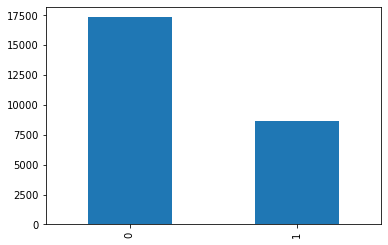

In [10]:
df.Recidivism.value_counts().plot(kind="bar")

Displayed above is a bar chart graphing how many people, when released from prison, will commit a crime. Those who commit another crime are marked '1', those who will not are marked '0'

In [11]:
df.OffenseSubtype.value_counts()

Trafficking                        6492
Assault                            3189
Burglary                           2965
Theft                              2680
OWI                                1792
Sex                                1277
Forgery/Fraud                      1209
Other Criminal                     1191
Drug Possession                    1142
Other Violent                       601
Traffic                             524
Murder/Manslaughter                 394
Weapons                             372
Alcohol                             356
Vandalism                           347
Robbery                             338
Other Public Order                  311
Other Drug                          281
Arson                               161
Sex Offender Registry/Residency     131
Flight/Escape                        84
Kidnap                               66
Special Sentence Revocation          63
Prostitution/Pimping                 38
Stolen Property                       9


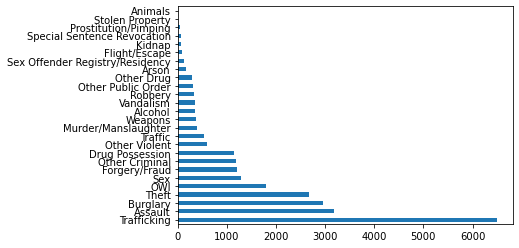

In [12]:
df.OffenseSubtype.value_counts().plot(kind='barh')

Above on this h-bar ,you can see the breakdown of what kinds of convictions the dataset has

In [13]:
df.Race.value_counts()

White       17596
Black        6111
Hispanic     1584
Native        502
Other         197
Name: Race, dtype: int64

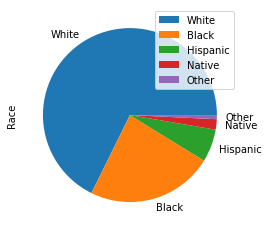

In [14]:
df.Race.value_counts().plot(kind='pie').legend()
plt.legend(loc="best")

Above is a pie chart of racial breakdowns

I had to change my dataset to numerics, viewed here

White       1
Black        2
Hispanic     3
Native        4
Other		  5
25-34           6
35-44           7
Under 25        8
45-54           9
55 and Older 	10
D Felony                                    11
C Felony                                     12
Aggravated Misdemeanor                       13
B Felony                                     14
Felony - Enhancement to Original Penalty     15
Felony - Enhanced                             16
Serious Misdemeanor                           17
Special Sentence 2005                          18
Felony - Mandatory Minimum                     19
Other Felony                                    20
A Felony                                        21
Simple Misdemeanor                              22
Other Felony (Old Code)                         23
Sexual Predator Community Supervision           24
Other Misdemeanor                 		25
Violent						26
Public Order					27
Property					28	
Drug						29
Other						30
5JD                   31
1JD                   32
2JD                   33
8JD                   34
7JD                   35
3JD                   36
6JD                   37
4JD                    38
ISC                    39
Interstate Compact 40
Parole                                 41
Discharged End of Sentence              42
Special Sentence                         43
Paroled to Detainer - Out of State       44
Paroled to Detainer - INS                45
Paroled to Detainer - U.S. Marshall       46
Paroled to Detainer - Iowa                47
Interstate Compact Parole                  48
Parole                        49
Discharged End of Sentence     50
Special Sentence                51
Paroled to Detainer             52
Trafficking                        53
Assault                            54
Burglary                           55
Theft                              56
OWI                                57
Sex                                58
Forgery/Fraud                     59
Other Criminal                     60
Drug Possession                    61
Other Violent                       62
Traffic                             63
Murder/Manslaughter                 64
Weapons                            65
Alcohol                             66
Vandalism                           67
Robbery                             68
Other Public Order                  69
Other Drug                          70
Arson                               71
Sex Offender Registry/Residency     72
Flight/Escape                        73
Kidnap                               74
Special Sentence Revocation          75
Prostitution/Pimping                 76
Stolen Property                       77
Animals                               78
yes             					79	
no					                80

*

In [15]:
nufi = "../input/recidivismnumeric2/Redicivism numeric.csv"
RD = pd.read_csv(nufi)  


print (RD)

       ReleaseYear  RReportYear  Race  ReleaseAge  OffenseClassification  \
0             2010         2013   1.0         8.0                     11   
1             2010         2013   1.0         9.0                     11   
2             2010         2013   1.0         6.0                     11   
3             2010         2013   1.0         9.0                     11   
4             2010         2013   2.0         6.0                     11   
...            ...          ...   ...         ...                    ...   
26015         2015         2018   4.0         6.0                     11   
26016         2015         2018   1.0         6.0                     11   
26017         2015         2018   2.0         8.0                     13   
26018         2015         2018   1.0         8.0                     11   
26019         2015         2018   1.0         7.0                     11   

       OffenseType  OffenseSubtype  District  Releas Type  ReleaseType2  \
0           

In [16]:
print(RD.shape)

frame = pd.DataFrame(RD)
my_imputerg = SimpleImputer()
frame = my_imputerg.fit_transform(frame)
print(pd.value_counts(frame.ravel()))

(26020, 12)
41.000000    31443
1.000000     26277
0.000000     17339
11.000000    17290
42.000000    14748
             ...  
7.243533         3
24.000000        2
23.000000        2
48.000000        1
25.000000        1
Length: 86, dtype: int64


In [17]:
frame = pd.DataFrame(frame)
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(frame.iloc[:, 3:])


labels = kmeans_model.labels_


print(pd.crosstab(labels, frame[11]))

11       0.0   1.0
row_0             
0        741   569
1      16598  8112


Above is a 'K-Means Cluster' giving a rough guess of which group has so far been either be a '0.0'(Won't Recidivate) or a '1.0' (Will Recidivate)

In [18]:
X = RD.drop("Recidivism", axis=1) # use all columns except target
y = RD["Recidivism"] # we want to predict y using X
clf = RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:

my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
#Every value must be refilled, there are several NANs in the original document
my_imputera = SimpleImputer()
X_test = my_imputera.fit_transform(X_test)

In [21]:
X_train

array([[2.01100000e+03, 2.01400000e+03, 1.00000000e+00, ...,
        4.20000000e+01, 4.20000000e+01, 8.00000000e+01],
       [2.01000000e+03, 2.01300000e+03, 2.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01],
       [2.01400000e+03, 2.01700000e+03, 2.00000000e+00, ...,
        4.14390244e+01, 4.15542863e+01, 8.00000000e+01],
       ...,
       [2.01500000e+03, 2.01800000e+03, 1.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01],
       [2.01000000e+03, 2.01300000e+03, 2.00000000e+00, ...,
        4.20000000e+01, 4.20000000e+01, 8.00000000e+01],
       [2.01100000e+03, 2.01400000e+03, 1.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01]])

In [22]:
X_test

array([[2.01200000e+03, 2.01500000e+03, 4.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 8.00000000e+01],
       [2.01300000e+03, 2.01600000e+03, 2.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01],
       [2.01500000e+03, 2.01800000e+03, 1.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01],
       ...,
       [2.01200000e+03, 2.01500000e+03, 1.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01],
       [2.01400000e+03, 2.01700000e+03, 1.00000000e+00, ...,
        4.14297264e+01, 4.15497512e+01, 8.00000000e+01],
       [2.01300000e+03, 2.01600000e+03, 1.00000000e+00, ...,
        4.10000000e+01, 4.10000000e+01, 7.90000000e+01]])

In [23]:
clf.fit(X_train, y_train);

In [24]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, ..., 0, 0, 1])

In [25]:
y_test

9979     0
13536    1
22076    1
3674     0
10906    0
        ..
25414    0
3058     0
11604    0
19137    0
16187    0
Name: Recidivism, Length: 5204, dtype: int64

In [26]:
clf.score(X_train, y_train)

0.8128362797847809

This is the Accuracy of our model,with training data. It is approximately 81.3% accurate!

In [27]:
clf.score(X_test, y_test)

0.6462336664104535

This is the accuracy with the actual tested data, approximately 65% accurate, meeting the qualifications of 50 percent.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3465
           1       0.46      0.32      0.38      1739

    accuracy                           0.65      5204
   macro avg       0.58      0.57      0.57      5204
weighted avg       0.62      0.65      0.63      5204



In [29]:
print("Well, " + txt + " here it is, we created a model that can predict recidivism with around a 63% accuracy")

Well, Will here it is, we created a model that can predict recidivism with around a 63% accuracy
